In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [68]:
import seaborn as sns
import os
import warnings
warnings.filterwarnings('ignore')


def load_txt(file_path):
    with open(file_path, 'r') as file:
        file_contents = file.read()
    return file_contents.split("\n")

def round_number(n):
    if n%5 == 0:
        return int(n)
    elif n%5 != 5:
        return int((n //5 +1) * 5)


def extract_category_mmlu(dataset_names):
    for i, _ in enumerate(dataset_names):
        extracted_name = dataset_names[i].split("_")[2:]
        if " ".join([name.title() for name in extracted_name]) == 'High School Government And Politics':
            
            dataset_names[i] = "High School Gov't and Politics"
        else:
            dataset_names[i] = " ".join([name.title() if name != "us" else name.upper() for name in extracted_name])
    
    return dataset_names

def add_domain_mmlu(mmlu_data):
    supercategories = load_txt('./mmlu_supercategories.txt')
    subsets = load_txt('./mmlu_subsets.txt')
    extract_category_mmlu(mmlu_data.dataset.values)
    mmlu_data["domain"] = mmlu_data["dataset"].map(dict(zip(subsets, supercategories)))
    return mmlu_data

    

In [199]:
from pathlib import Path
root_dir = Path("/Users/lihongxuan/Desktop/AIPI/Courses/AIPI540/quantization-workbench/opencompass_evaluation/evaluation_results/")

mmlu_data_4 = add_domain_mmlu(pd.read_csv(root_dir / "4-bit/MMLU/20240323_050456/summary/summary_20240323_050456.csv").iloc[:, [0, -1]])
mmlu_data_8 = add_domain_mmlu(pd.read_csv(root_dir / "8-bit/MMLU/20240324_085416/summary/summary_20240324_085416.csv").iloc[:, [0, -1]])
mmlu_data_16 = add_domain_mmlu(pd.read_csv(root_dir / "16-bit/MMLU/20240325_005751/summary/summary_20240325_005751.csv").iloc[:, [0, -1]])


mmlu_data_4.columns = ["dataset", "4-bit", "domain"]
mmlu_data_8.columns = ["dataset", "8-bit", "domain"]
mmlu_data_16.columns = ["dataset", "16-bit", "domain"]

mmlu_data = pd.merge(mmlu_data_16, mmlu_data_8, how = "left", on = ["dataset", "domain"])
mmlu_data = pd.merge(mmlu_data, mmlu_data_4, how = "left", on = ["dataset", "domain"])
mmlu_data = mmlu_data.iloc[:, [0, 2, 1, 3, 4]]

mmlu_data["average"] = mmlu_data.iloc[:, -3:].mean(axis= 1)

mmlu_data.sort_values(by = "average", ascending= False, inplace=True)
# mmlu_data = mmlu_data.iloc[:, :-1]
supercategory_colors = ["red", 'green', 'blue', 'purple']
mmlu_data["color"] = mmlu_data.domain.map(dict(zip(np.unique(mmlu_data.domain.values), supercategory_colors)))  
mmlu_data

,dataset,domain,16-bit,8-bit,4-bit,average,color
41,High School Gov't and Politics,Social Sciences,85.49,87.42,84.46,85.790000,purple
14,Marketing,Other,85.04,83.76,86.32,85.040000,green
25,World Religions,Humanities,83.63,82.13,82.46,82.740000,red
55,US Foreign Policy,Social Sciences,81.00,80.00,81.00,80.666667,purple
53,High School Psychology,Social Sciences,79.45,79.08,80.00,79.510000,purple
17,International Law,Humanities,80.99,74.38,79.34,78.236667,red
39,Miscellaneous,Other,78.29,75.61,77.65,77.183333,green
50,High School US History,Humanities,75.98,76.20,75.49,75.890000,red
46,High School World History,Humanities,75.53,73.00,74.68,74.403333,red
16,High School Geography,Social Sciences,76.26,71.32,74.24,73.940000,purple


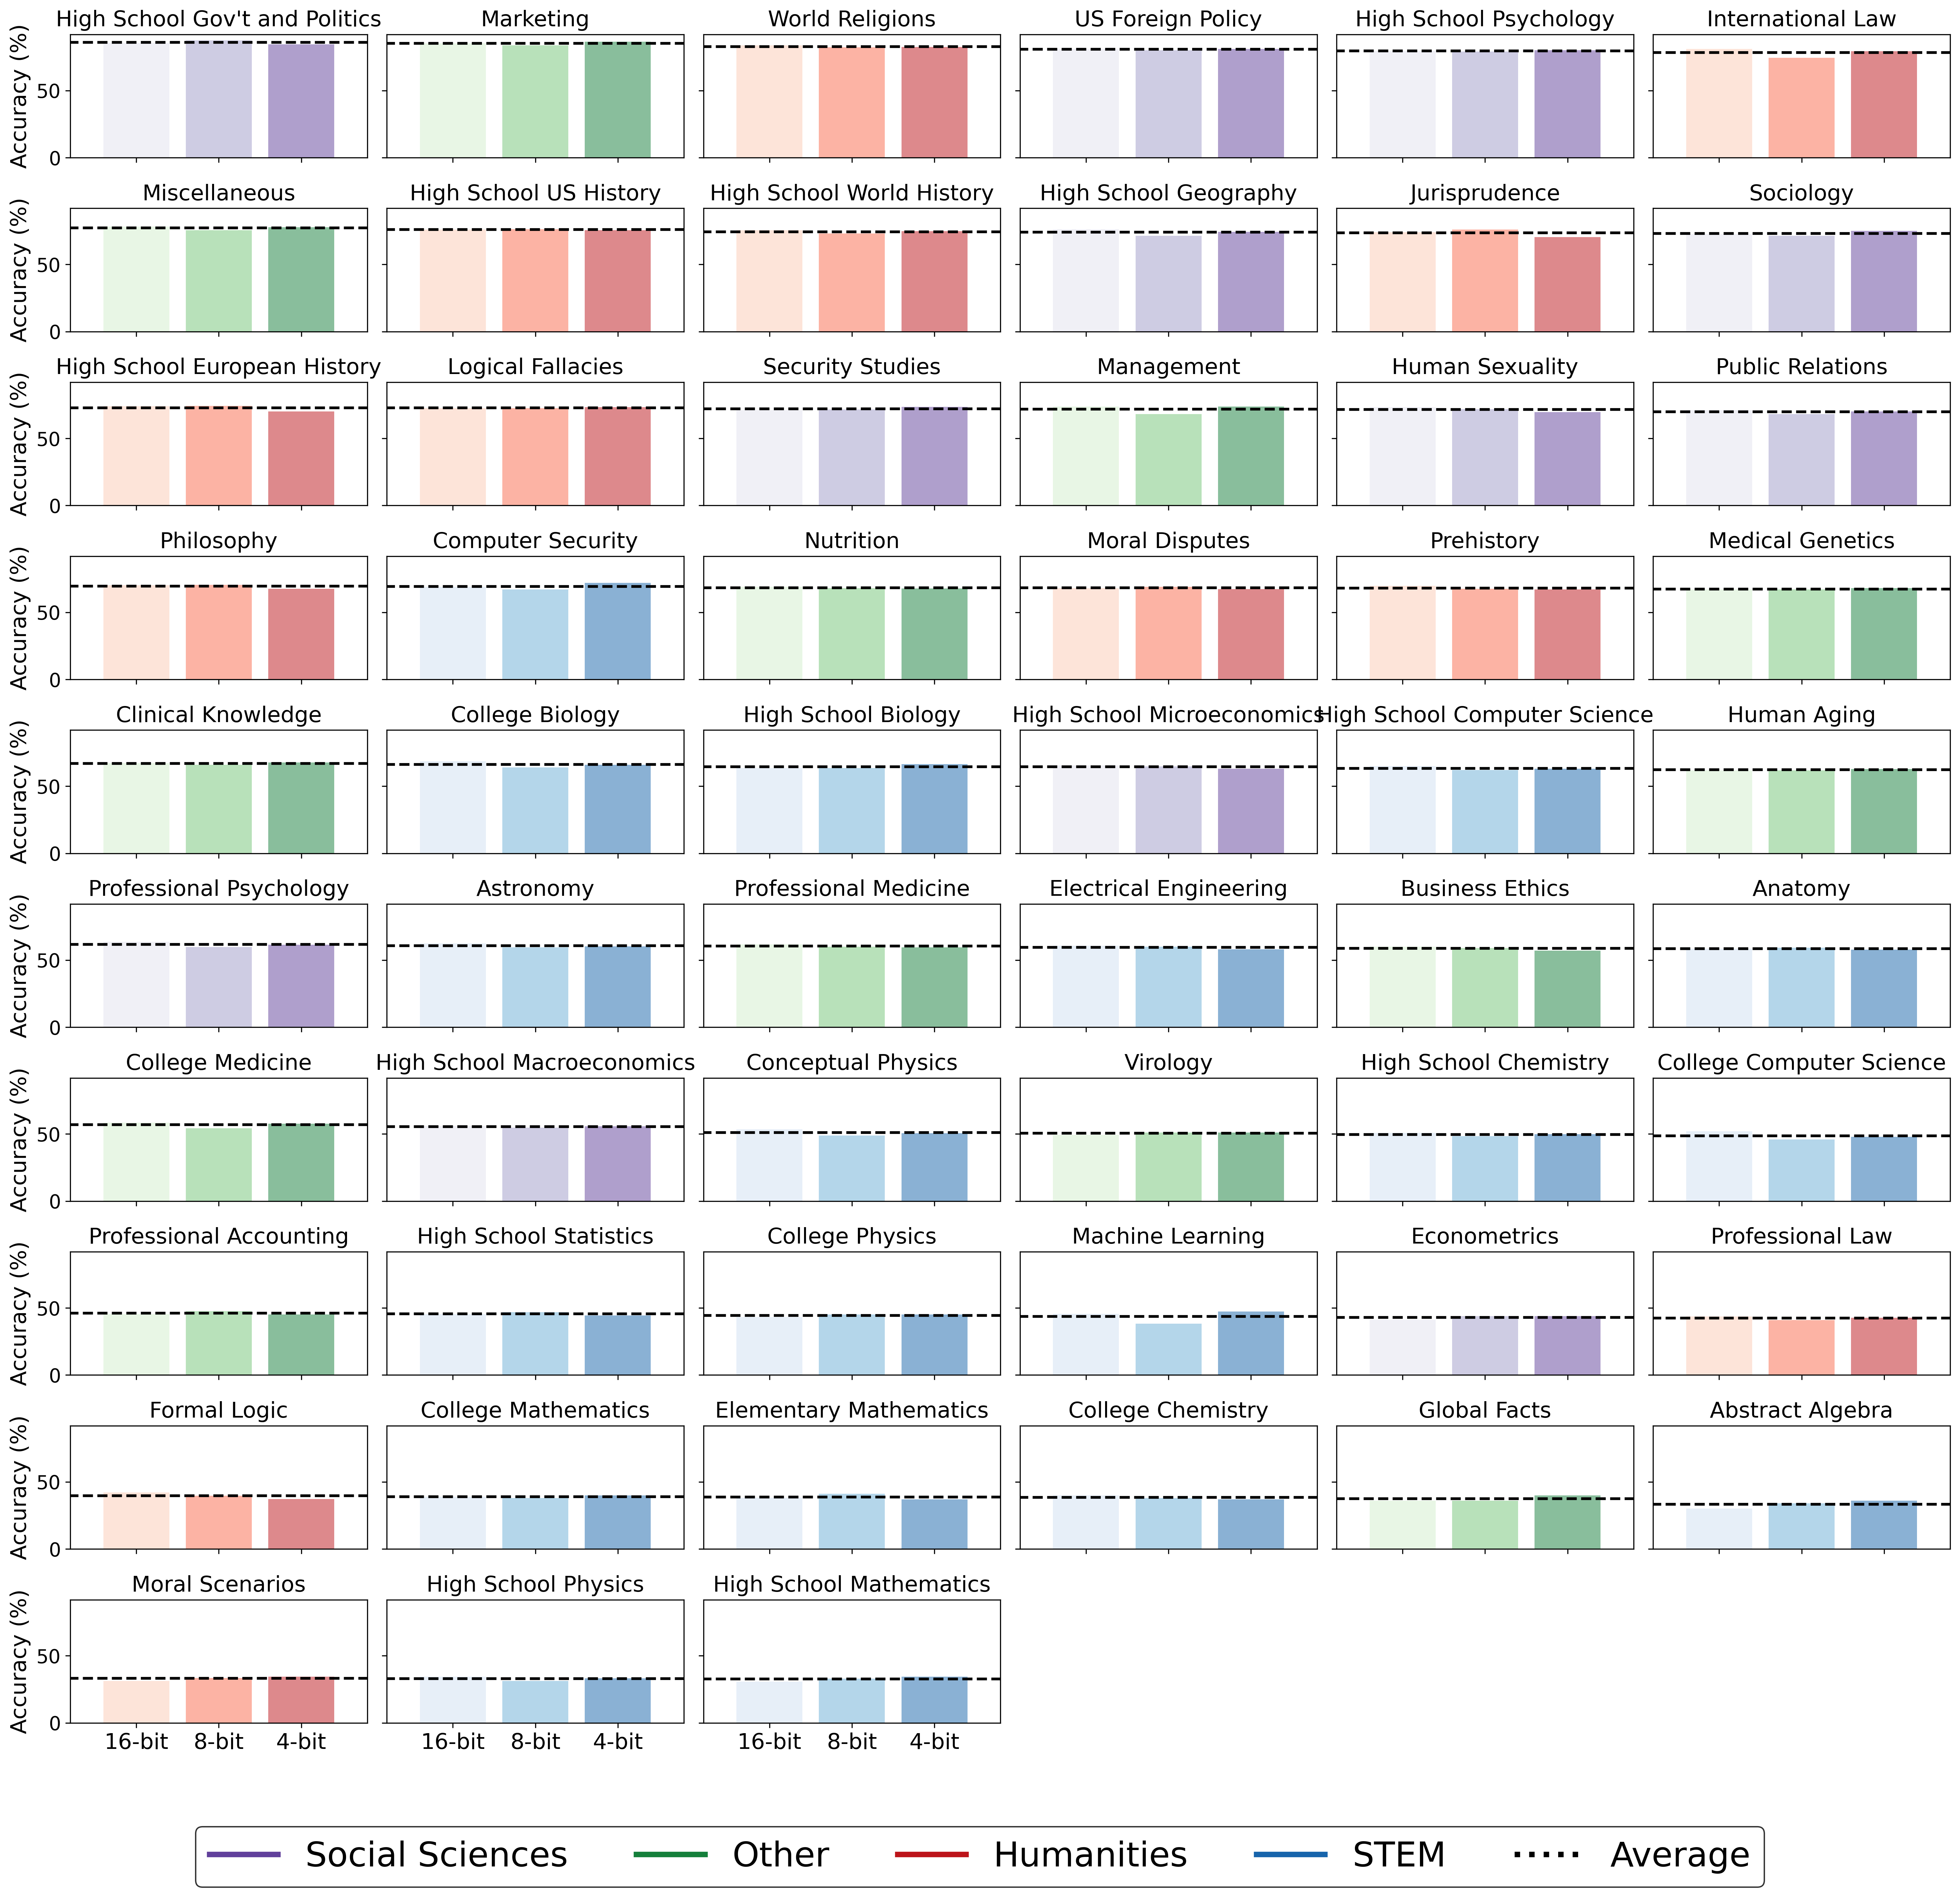

In [279]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.lines import Line2D


data = mmlu_data.iloc[:, [1, -1]].values
color_code = dict(zip(data[:, 0], data[:, 1]))

ncols = 10
nrows = 6

# Create figure and subplots
fig, axs = plt.subplots(ncols, nrows, figsize=(ncols*2, nrows*3), constrained_layout=True, sharey= True, sharex=True, dpi = 300)  # Adjust the size as needed
axs = axs.flatten()  # Flatten to 1D array for easier iteration

for i, ax in enumerate(axs):
    if i < 57:  # Plot only for the first 57 subplots
        
 
        model_performance = mmlu_data.iloc[i, 2:-2].values
        model_sizes = [100, 200, 300]  # Example model sizes

     
        colors = np.linspace(0.2, 0.8, len(model_sizes))  # Generate gradual color values

        color_map = dict(zip(np.unique(mmlu_data.color.values), [plt.cm.Blues, plt.cm.Greens, plt.cm.Purples, plt.cm.Reds]))

        ax.bar(range(len(model_performance)), model_performance, color=color_map[mmlu_data.iloc[i, -1]](colors), alpha = 0.5)

        ax.hlines(mmlu_data.iloc[i, -2], -1, 4, ls = "--", lw = 2, color = "black")
        # Adding labels and title
        if i%nrows == 0:
            ax.set_ylabel("Accuracy (%)", fontsize = 16)
        # if i>=54:
        #     ax.set_xlabel("Quantized Model", fontsize = 16)

        ax.tick_params(axis='both', which='major', labelsize=14)
        
        ax.set_title(mmlu_data.iloc[i, 0], fontsize = 16)

        ax.set_xticks([0, 1, 2])
        ax.set_xticklabels(["16-bit", "8-bit", "4-bit"], fontsize = 16)

        
    else:
        ax.axis('off')  # Hide unused subplots

    ax.set_xlim(-0.8, 2.8)

legend_colors = [color_map[color_value](colors[-1]) for color_value in list(color_code.values())]


# Define custom legend
custom_lines = [Line2D([0], [0], color=color, lw=4) for color in legend_colors] \
    + [Line2D([0], [0], color="black", lw=4, ls = ":")]
#

legned_values = list(color_code.keys()) + ['Average']
legend = fig.legend(custom_lines, legned_values, loc='center', ncol=6, fontsize= 25 , bbox_to_anchor = (0.5, -0.05))
frame = legend.get_frame()
frame.set_edgecolor('black')
frame.set_facecolor("white")

# Adjust layout to prevent overlap
fig.tight_layout()
plt.savefig("./eval_mmlu_subdomain.png", bbox_inches='tight')
plt.show()


In [257]:
mmlu_domain = mmlu_data.iloc[:, [1,2,3,4]].groupby("domain").mean().reset_index().iloc[[0, 2, 3, 1],[0, 3, 2, 1]]

mmlu_domain["Original"] = [67.1, 50.5, 70.2, 63.2]

mmlu_domain

,domain,4-bit,8-bit,16-bit,Original
0,Humanities,64.767692,65.362308,66.250000,67.1
2,STEM,49.798421,48.612105,50.036842,50.5
3,Social Sciences,69.310833,68.625833,69.705000,70.2
1,Other,62.641538,61.395385,62.542308,63.2


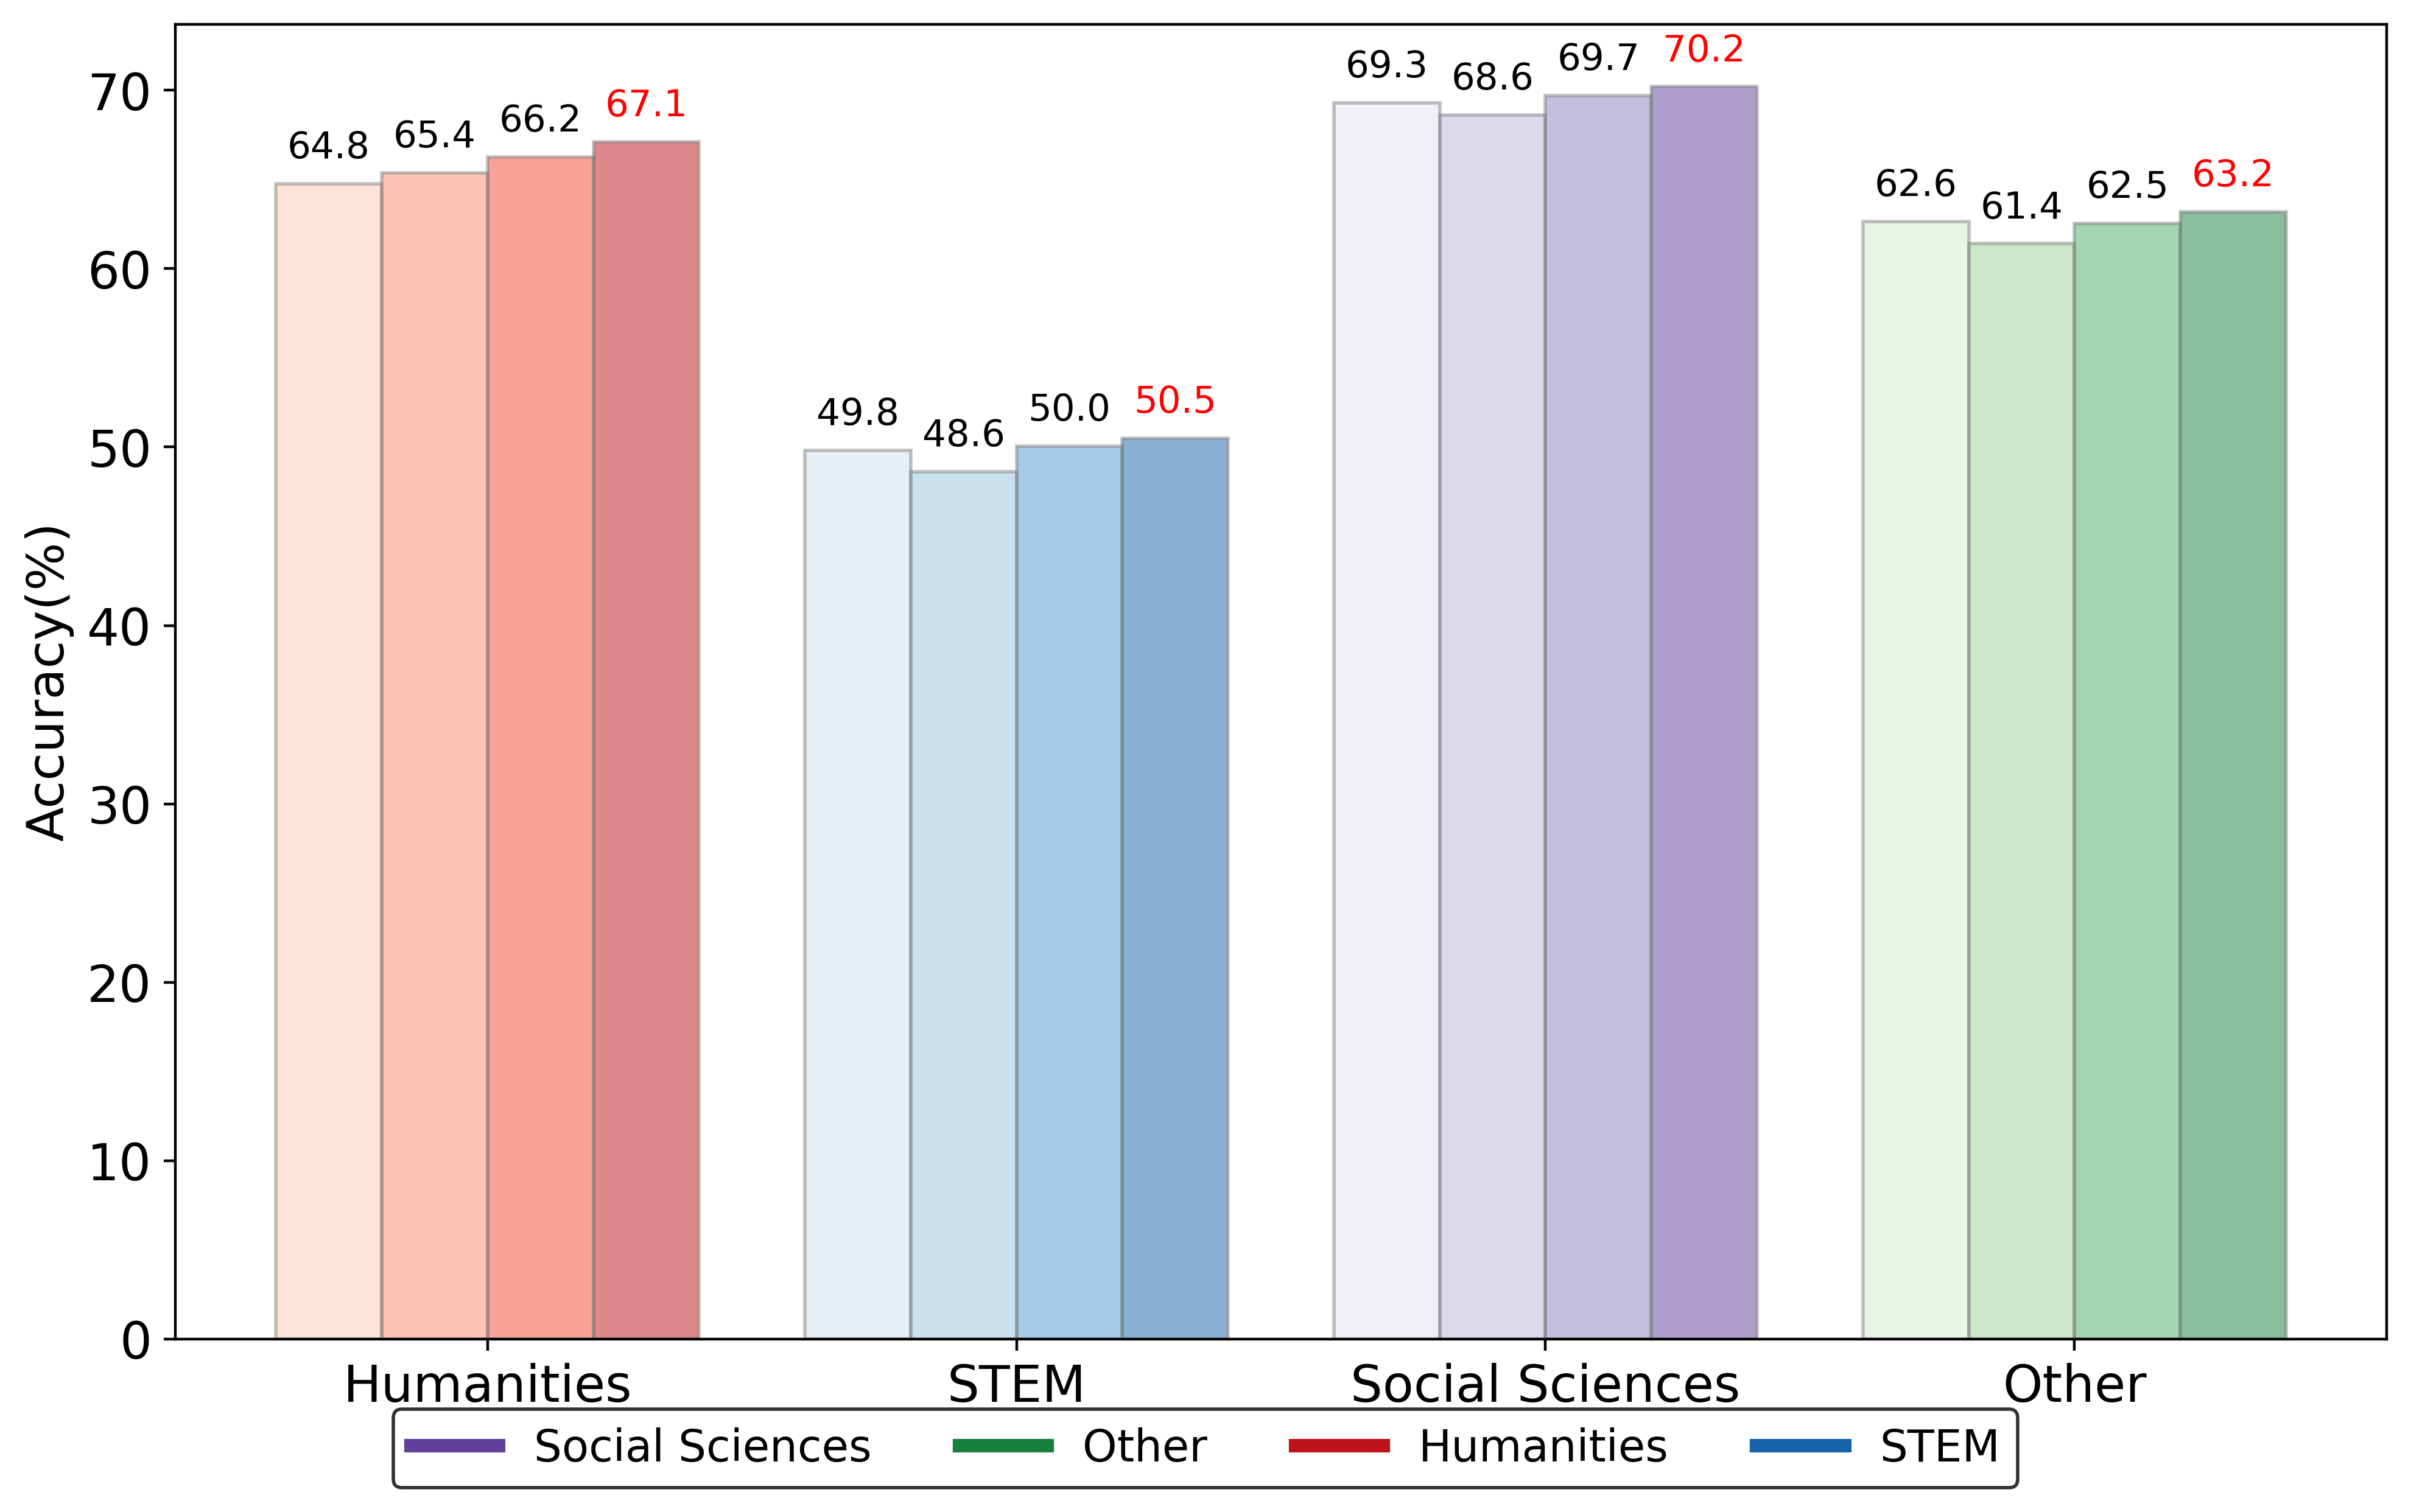

In [278]:
import matplotlib.pyplot as plt
import numpy as np


fig,ax = plt.subplots(dpi =400, figsize = (10, 6))


groups = ['Group 1', 'Group 2', 'Group 3', 'Group 4']
bars = ['Humanities', 'STEM', 'Social Sciences', 'Other']

data = np.array([mmlu_domain.iloc[i, 1:].values for i in range(4)])

bar_width = 0.2
fact = 1

r1 = np.arange(len(bars))
r2 = [x + bar_width * fact for x in r1]
r3 = [x + bar_width * fact for x in r2]
r4 = [x + bar_width * fact for x in r3]


colors = np.linspace(0.2, 0.8, 4)  # Generate gradual color values

color_map = dict(zip(np.unique(mmlu_data.color.values), [plt.cm.Blues, plt.cm.Greens, plt.cm.Purples, plt.cm.Reds]))


color_map = np.array([color_map["red"](colors), 
             color_map["blue"](colors), color_map["purple"](colors), color_map["green"](colors)])

# Create the bar plot
ax.bar(r1, data[:, 0], width=bar_width, edgecolor='grey', label=groups[0], color=color_map[:, 0], alpha = 0.5)
ax.bar(r2, data[:, 1], width=bar_width, edgecolor='grey', label=groups[1], color=color_map[:, 1], alpha = 0.5)
ax.bar(r3, data[:, 2], width=bar_width, edgecolor='grey', label=groups[2], color=color_map[:, 2], alpha = 0.5)
ax.bar(r4, data[:, 3], width=bar_width, edgecolor='grey', label=groups[3], color=color_map[:, 3], alpha = 0.5)

# Add values on top of each bar
for i, (r, group_data) in enumerate(zip([r1, r2, r3, r4], data.T)):
    for x, value in zip(r, group_data):
        if i==3:
            color = "red"
        else:
            color=  "black"

        plt.text(x, value + 1, str(np.round(value,1)), ha='center', va='bottom', fontsize = 11, color = color)


ax.set_ylabel('Accuracy(%)', fontsize = 15)
ax.set_xticks([r + bar_width * 1.5 for r in range(len(bars))], bars)
ax.tick_params(axis='both', which='major', labelsize=15)
# Add a legend
# Define custom legend
custom_lines = [Line2D([0], [0], color=color, lw=4) for color in legend_colors]
legned_values = list(color_code.keys())
legend = fig.legend(custom_lines, legned_values, loc='center', ncol=6, fontsize= 13 , bbox_to_anchor = (0.5, 0))
frame = legend.get_frame()
frame.set_edgecolor('black')
frame.set_facecolor("white")


# Show the plot
fig.tight_layout()
plt.savefig("./eval_mmlu_superdomain.png", bbox_inches='tight')
plt.show()


In [201]:
mmlu_data.iloc[:, [2,3,4]].mean()

16-bit    60.727368
8-bit     59.561228
4-bit     60.249474
dtype: float64

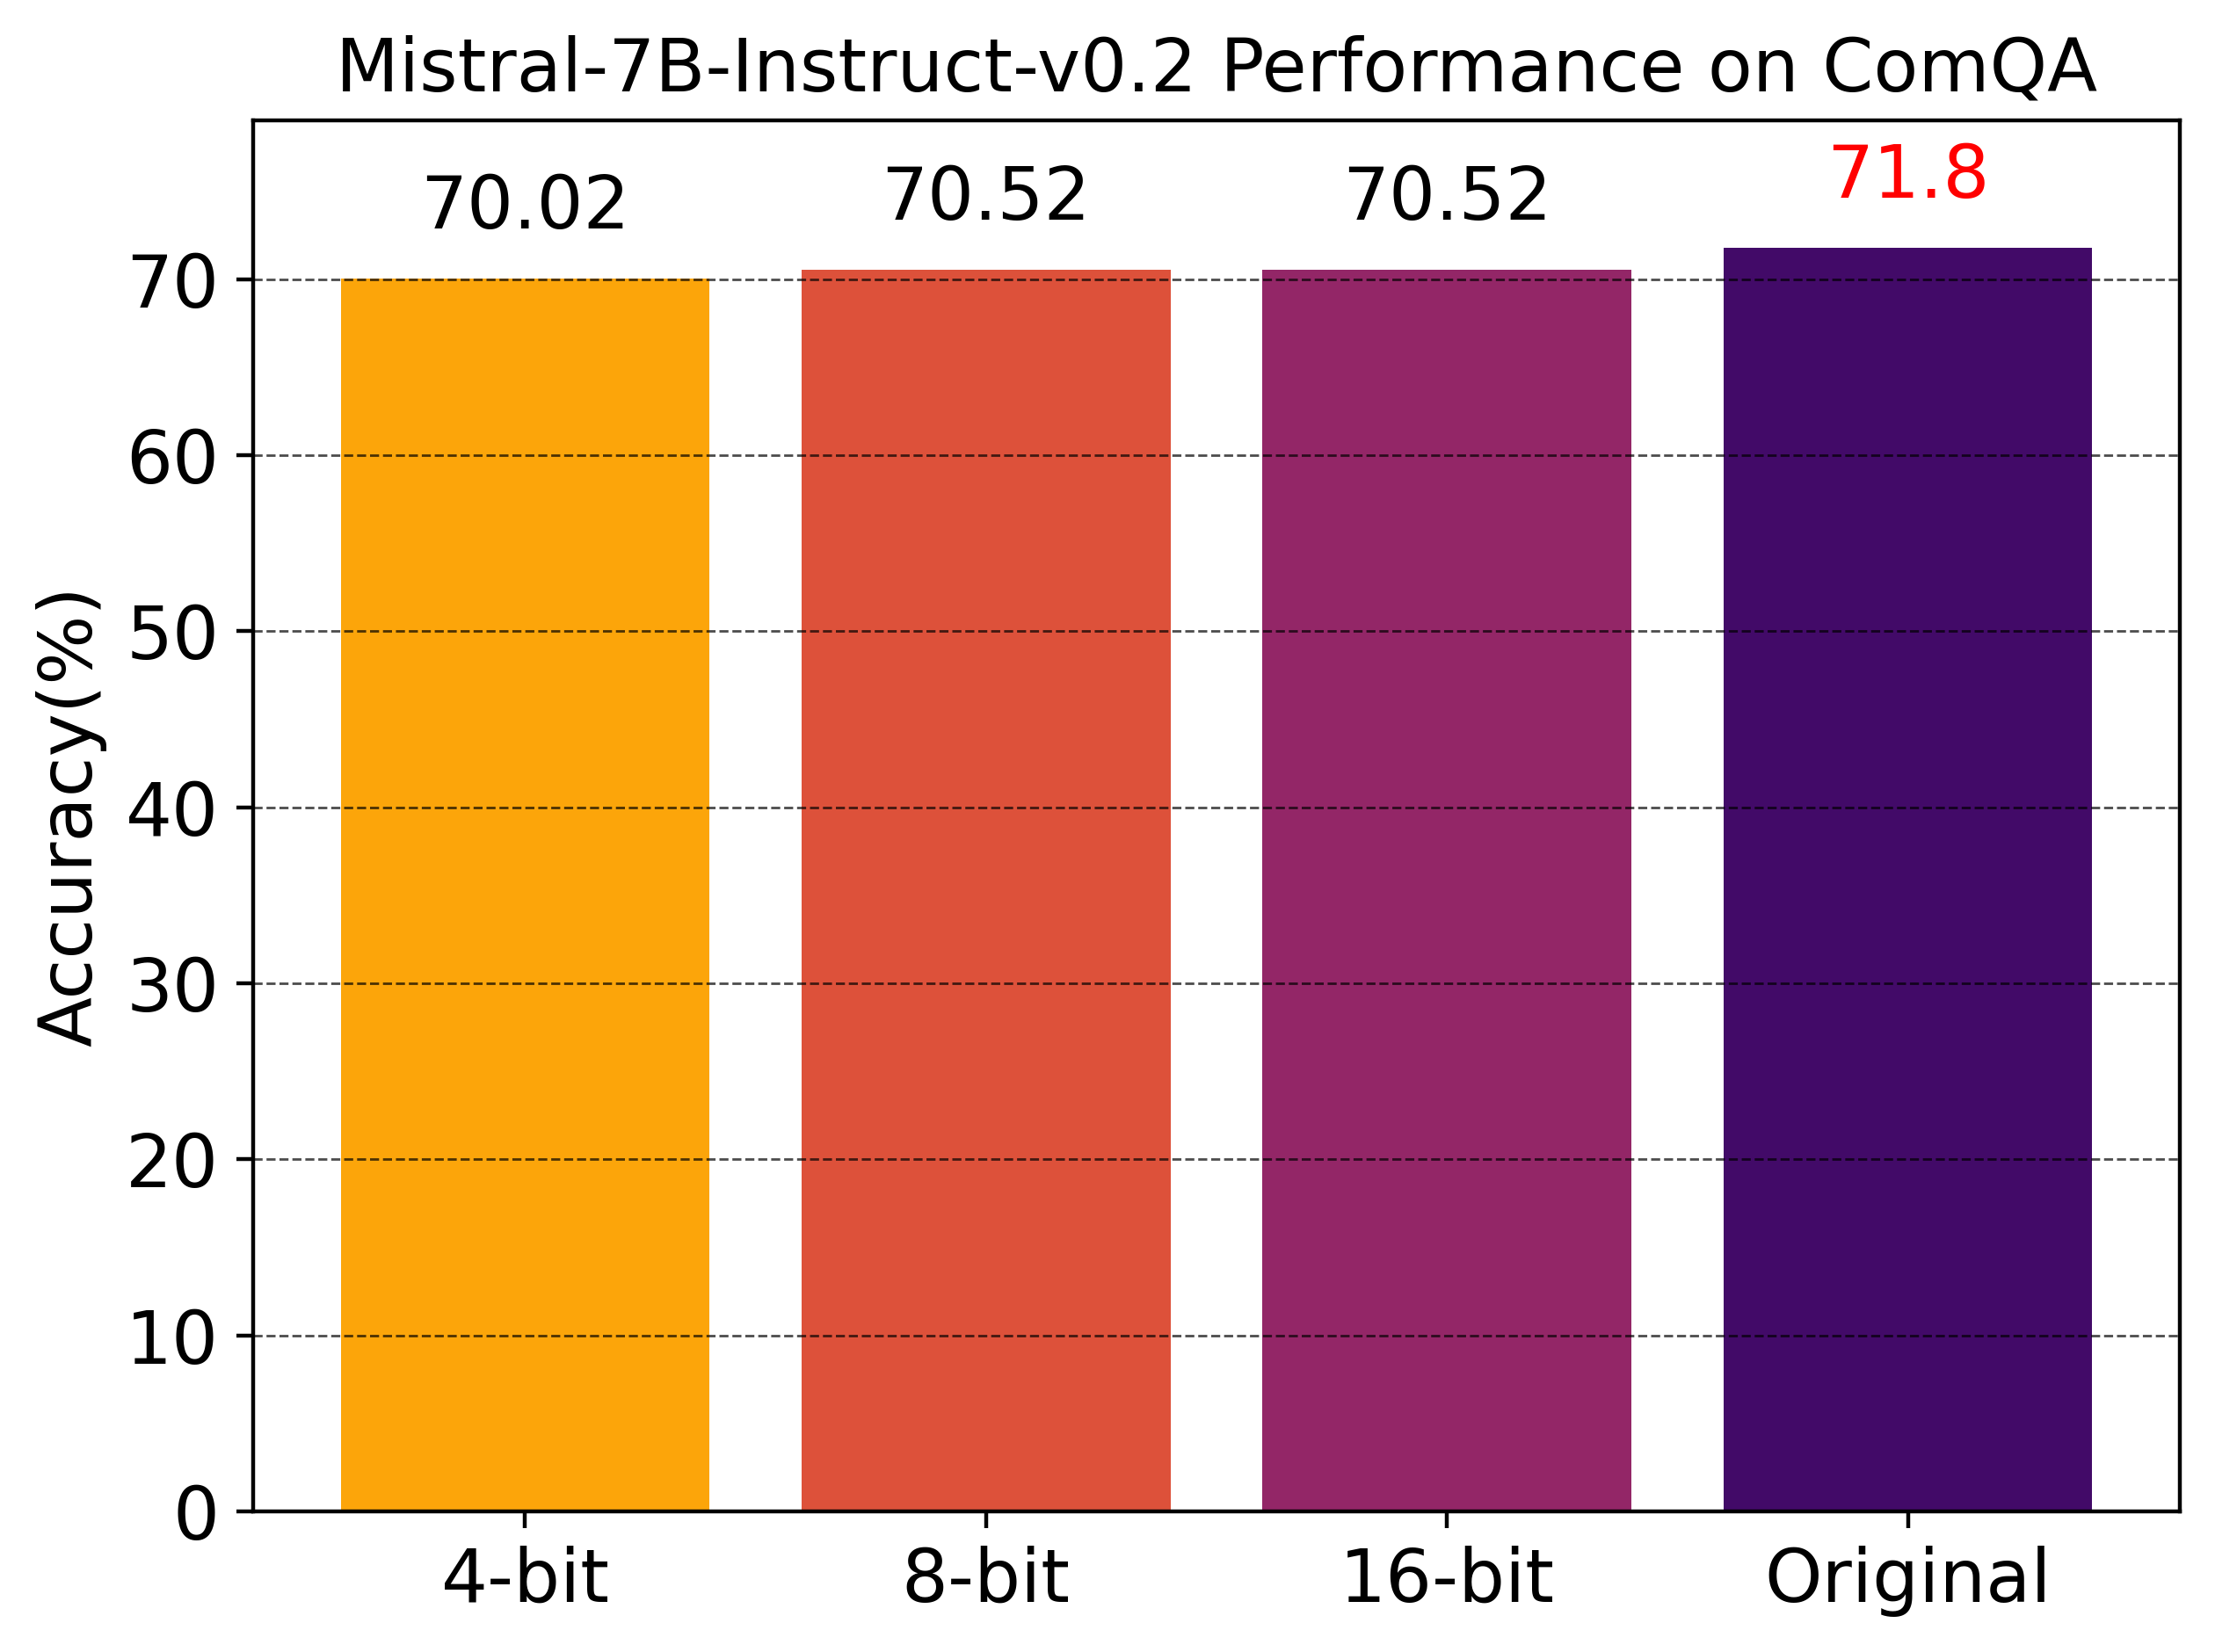

In [204]:
import matplotlib.pyplot as plt
import numpy as np

model_performance = [70.02, 70.52, 70.52, 71.8]
model_sizes = [100, 200, 300, 400]  



colors = plt.cm.inferno(np.linspace(0.2, 0.8,  len(model_sizes)))

# Create figure and axis objects
fig, ax = plt.subplots(dpi = 400)


bars = ax.bar(range(len(model_performance)), model_performance, color=colors[::-1], alpha = 1)

ax.set_ylabel('Accuracy(%)', fontsize = 15)
ax.set_title('Mistral-7B-Instruct-v0.2 Performance on ComQA', fontsize = 15)

ax.grid(axis = "y", color = "black", linestyle = "--", linewidth = 0.5, alpha = 0.7)

ax.set_xticks([0, 1, 2, 3])
ax.set_xticklabels([ "4-bit", "8-bit", "16-bit", "Original"], fontsize = 15)

ax.tick_params(axis='both', which='major', labelsize=15)

# Adding values on top of the bars
for i, bar in enumerate(bars):
    height = bar.get_height()
    if i == 3:
        color = "red"
    else:
        color = "black"
    ax.text(bar.get_x() + bar.get_width() / 2, height + 2, model_performance[i], ha='center', va='bottom', fontsize = 15, color = color)
# # Adding custom color legend based on model sizes

ax.set_ylim(0, 79)
# Display the plot
fig.tight_layout()
plt.savefig("./eval_comqa.png", bbox_inches='tight')
plt.show()


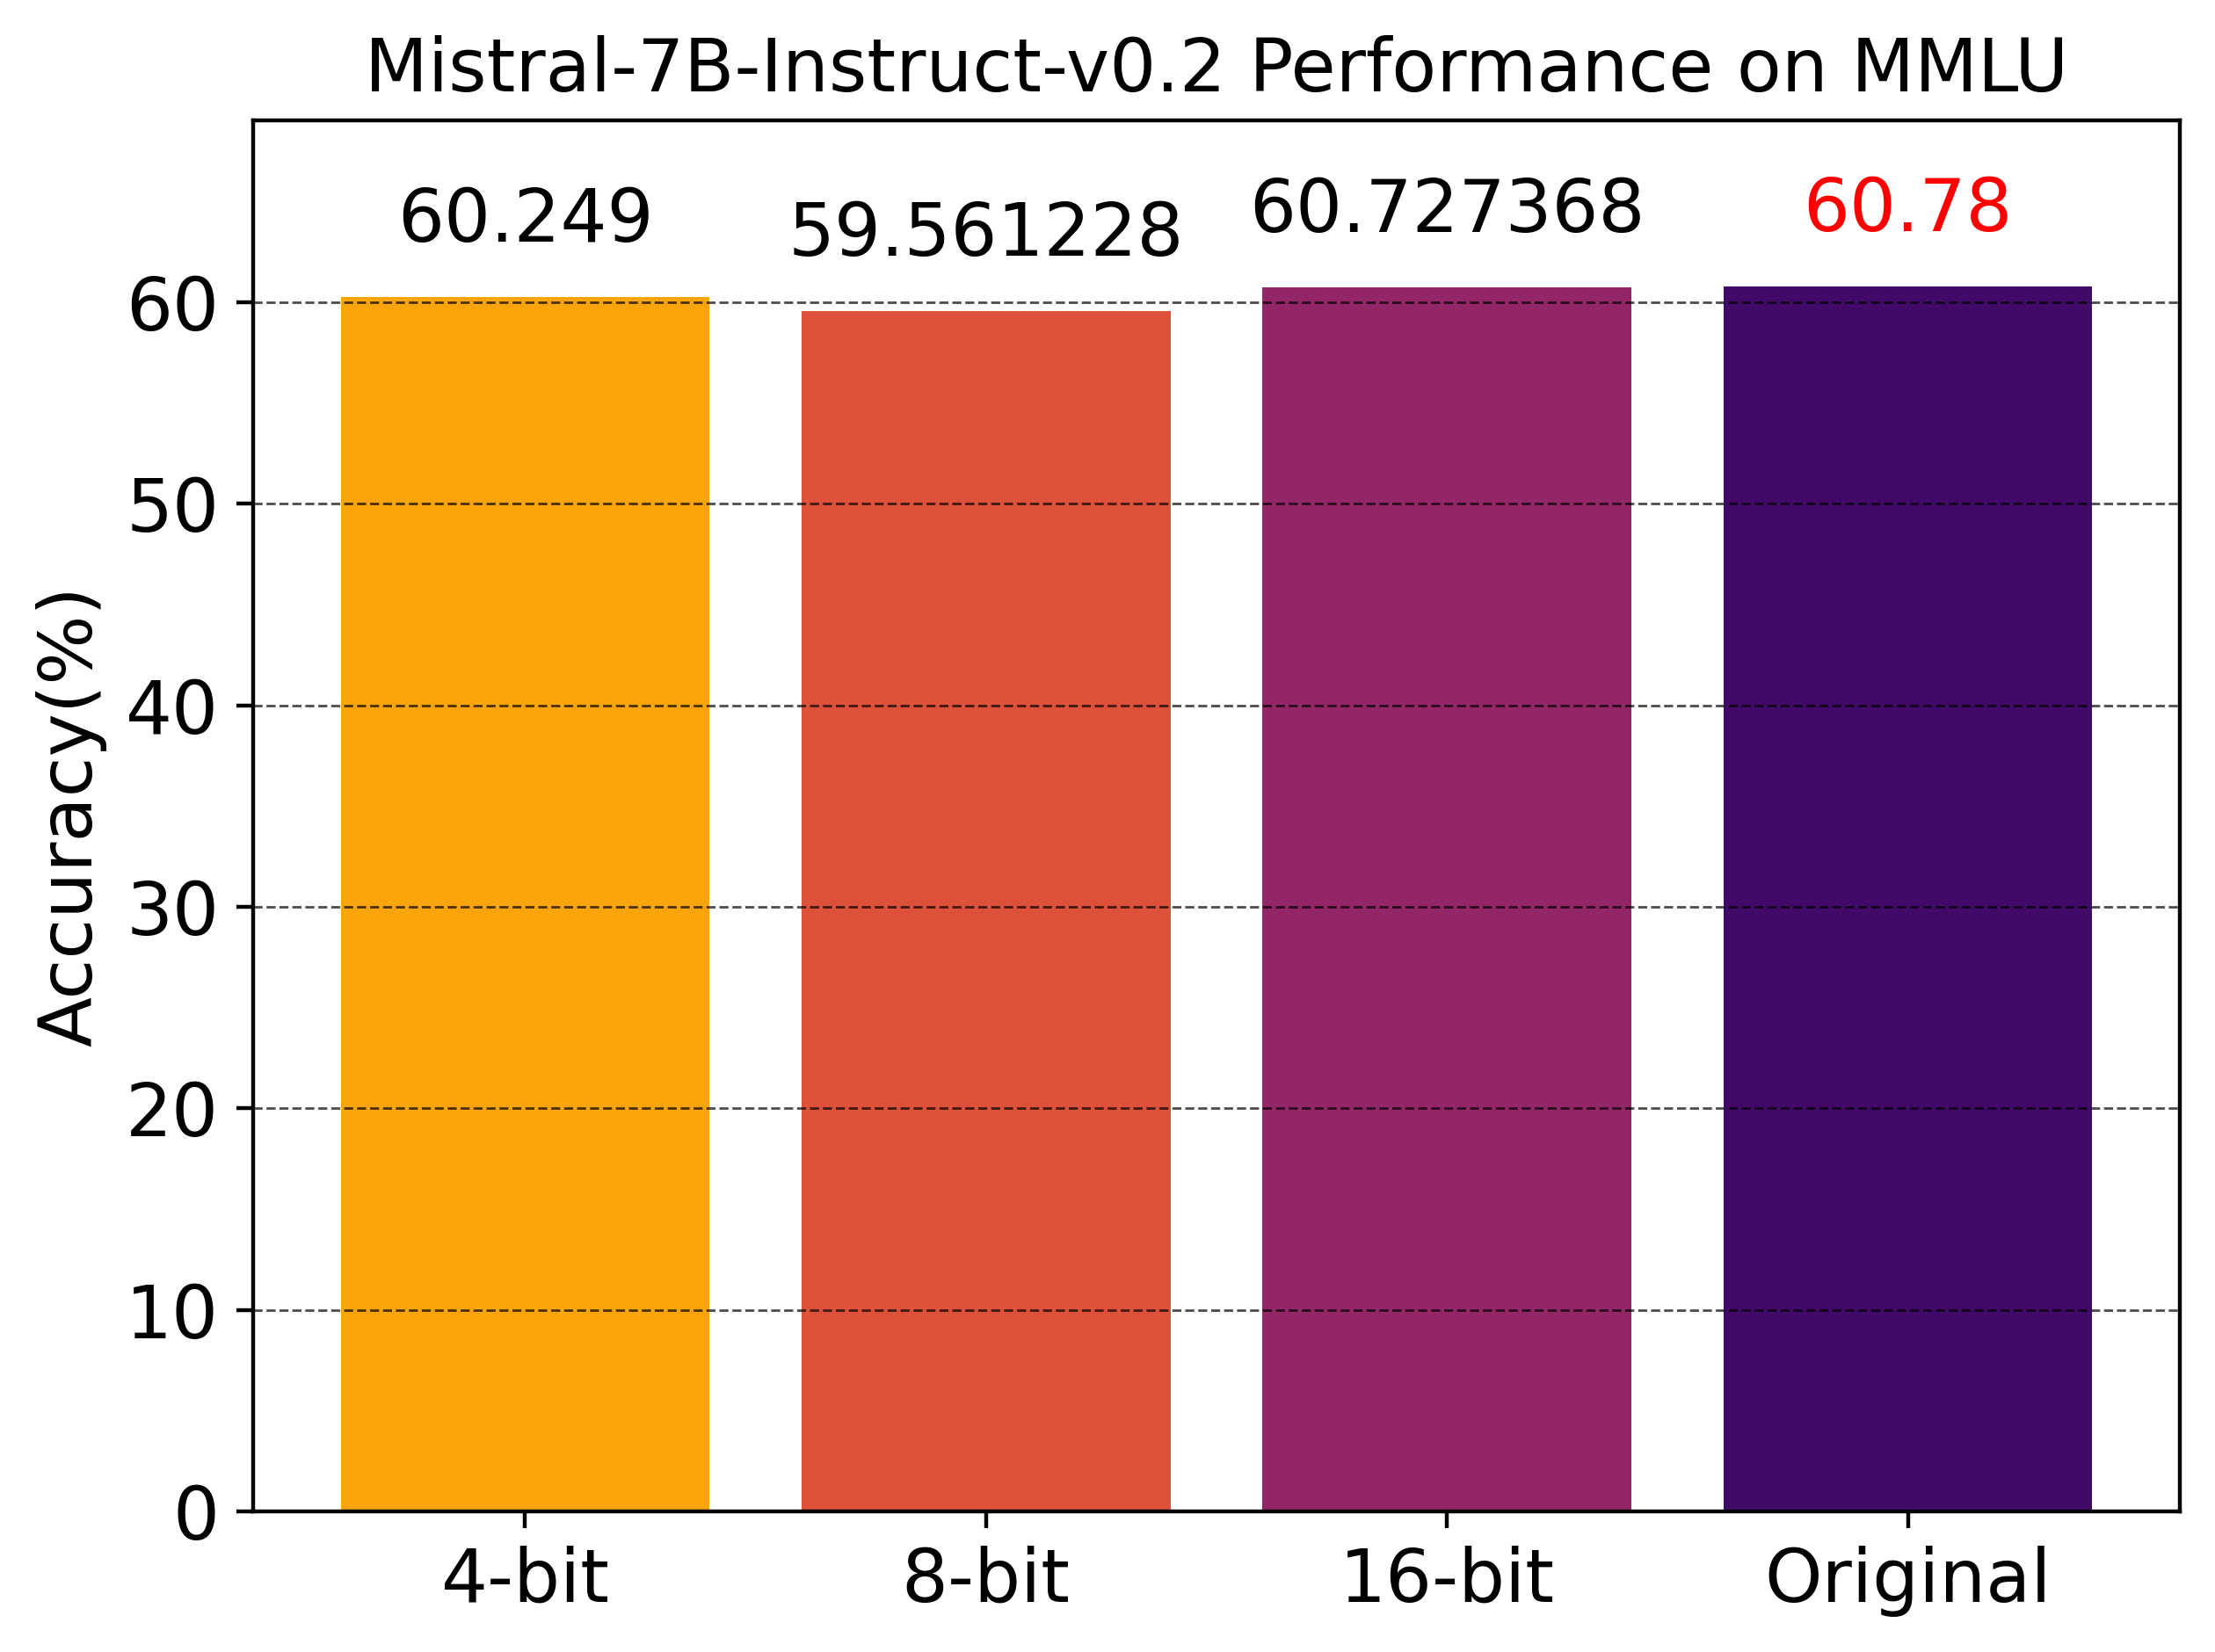

In [203]:
import matplotlib.pyplot as plt
import numpy as np

model_performance = [60.249, 59.561228, 60.727368, 60.78]  
model_sizes = [100, 200, 300, 400]  


colors = plt.cm.inferno(np.linspace(0.2, 0.8,  len(model_sizes)))


fig, ax = plt.subplots(dpi = 400)


bars = ax.bar(range(len(model_performance)), model_performance, color=colors[::-1], alpha = 1)

ax.set_ylabel('Accuracy(%)', fontsize = 15)
ax.set_title('Mistral-7B-Instruct-v0.2 Performance on MMLU', fontsize = 15)
ax.set_xticks([0, 1, 2, 3])
ax.set_xticklabels([ "4-bit", "8-bit", "16-bit", "Original"], fontsize = 15)
ax.tick_params(axis='both', which='major', labelsize=15)

ax.grid(axis = "y", color = "black", linestyle = "--", linewidth = 0.5, alpha = 0.7)

# Adding values on top of the bars
for i, bar in enumerate(bars):
    height = bar.get_height()
    if i == 3:
        color = "red"
    else:
        color = "black"
    ax.text(bar.get_x() + bar.get_width() / 2, height + 2, model_performance[i], ha='center', va='bottom', fontsize = 15, color = color)

ax.set_ylim(0, 69)
# Display the plot
fig.tight_layout()
plt.savefig("./eval_mmlu.png", bbox_inches='tight')
plt.show()
